## General Setup

In [1]:
!pip install jcopml
!pip install xgboost

## A dabbling into PCA (Royce's BS)

*PCA is most commonly used when many of the variables are highly correlated with each other and it is desirable to reduce their number to an independent set.*
Principal component analysis (PCA).

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.

In [276]:
def PCA_processing(N,data,p_num_list,p_cat_list):
    #p_list is the variables that you want to preserve, i.e. they will not be processed by PCA
    #imdb_rating cannot be preserved or it'd couse a leakage
    assert ("imdb_rating" in (p_num_list+p_cat_list))!=True
    
    lol = data.dropna()
    lol = lol.reset_index(drop=True)
    
    #Process data with PCA
    X_PCA=lol.drop(columns=["imdb_rating"]+p_num_list+p_cat_list)
    pca=PCA(n_components=N)
    PCA_columns=list(map(str, range(N)))
    X_PCA=pd.DataFrame(pca.fit_transform(X_PCA),columns=PCA_columns)
    
    #Concotenate X_PCA with data preserved
    X_PCA[p_num_list+p_cat_list]=lol[p_num_list+p_cat_list]
    X_train, X_test, y_train, y_test = train_test_split(X_PCA, lol["imdb_rating"], train_size=0.7, random_state=42)
    
    #Get the pipeline or names
    num_list=PCA_columns+p_num_list
    
    #Final dataFrame for reference 
    X_PCA["imdb_rating"]=lol["imdb_rating"]
    
    #return (the name lists of new columns) (Train/Tesr data) (The holistic data processed)
    return (num_list,p_cat_list),(X_train, X_test, y_train, y_test),X_PCA

The aforementioned function processes inexplicable or unimportant data by the PCA algorithm, which decomposes the dimensions of insignificant features. 

**Potentially viable future refinement**:
- return the num_list and cat_list instead of the pipeline if we want to edit the pipeline out of the function;
- get the optimal preserved(sinificant) categories and the optimal "N" by trials;
- One can always tidy up my grubby code easily.




In [277]:
pca=PCA_processing(N=20,data=df,
                   p_num_list=['total_votes','n_lines','viewership','duration','writer_count',
                               'main_chars_count','guest_stars_count','imdb_rating_prev','writer_mean_rating',
                               'director_mean_rating','main_chars_mean_rating'],
                   p_cat_list=[])
pipeline=preprocess(*pca[0])
X_train, X_test, y_train, y_test=pca[1]

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END .............................algo__n_estimators=151; total time=   0.2s
[CV] END .............................algo__n_estimators=151; total time=   0.2s
[CV] END .............................algo__n_estimators=151; total time=   0.2s
[CV] END .............................algo__n_estimators=192; total time=   0.2s
[CV] END .............................algo__n_estimators=192; total time=   0.2s
[CV] END .............................algo__n_estimators=192; total time=   0.2s
[CV] END .............................algo__n_estimators=114; total time=   0.1s
[CV] END .............................algo__n_estimators=114; total time=   0.1s
[CV] END .............................algo__n_estimators=114; total time=   0.1s
[CV] END .............................algo__n_estimators=171; total time=   0.2s
[CV] END .............................algo__n_estimators=171; total time=   0.2s
[CV] END .............................algo__n_es

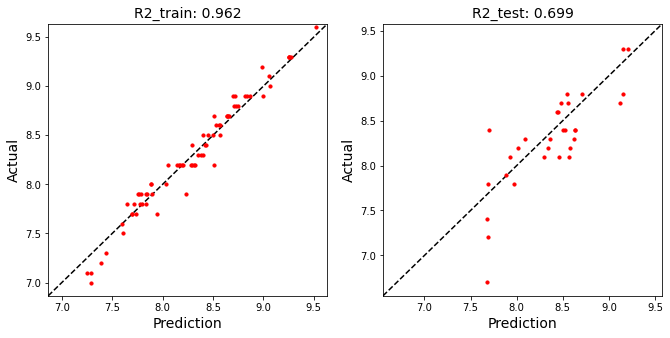

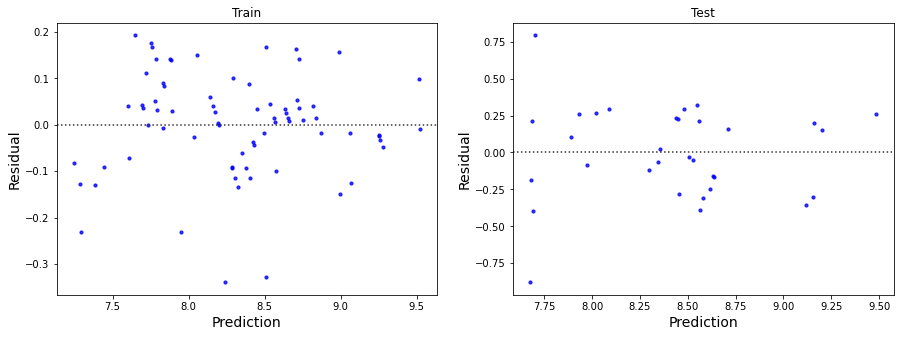

In [278]:
best_estimator = hyperparameter_tuning(pipeline, X_train, X_test, y_train, y_test)